In [11]:
pip install astroquery astropy pysiaf synphot numpy scipy scikit-learn pandas matplotlib crds


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached crds-12.0.3-py3-none-any.whl.metadata (9.5 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached asdf-3.5.0-py3-none-any.whl.metadata (14 kB)
  Using cached Parsley-1.3-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached asdf_standard-1.1.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached asdf_transform_schemas-0.5.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
Using cached crds-12.0.3-py3-none-any.whl (1.1 MB)
Using cached asdf-3.5.0-py3-none-any.whl (967 kB)
Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
Using cached Parsley-1.3-py2.py3-none-any.whl (88 kB)
Using cached asdf_standard-1.1.1-py3-none-any.whl (81 kB)
Using cached asdf_transform_schemas-0.5.0-py3-none-any.whl (275 kB)
Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)

In [12]:
from astroquery.mast import Mast, Observations

Mast.login('8a7a69f93ce64b928f3ae6f7dc18d660')

INFO: MAST API token accepted, welcome Devanshi Singh [astroquery.mast.auth]


In [13]:
from astroquery.mast import MastMissions
from astropy.coordinates import SkyCoord

In [14]:
# Creating MastMissions object to assign mission to 'jwst'
missions = MastMissions(mission='jwst')

print(f'Mission: {missions.mission}')
print(f'Service: {missions.service}')

Mission: jwst
Service: search


In [17]:
# Get available columns for JWST mission
missions = missions.get_column_list()
print(*missions, sep='\n') 

   name    data_type           description           
---------- --------- --------------------------------
search_pos    string Search Position (RA and Dec)    
     name     data_type    description   
------------- --------- -----------------
ArchiveFileID   integer ArchiveFileID    
    name    data_type                                                                                                                                                                                                                                  description                                                                                                                                                                                                                                  
----------- --------- -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
from astroquery.mast import Observations
from astropy.coordinates import SkyCoord
import astropy.units as u

ra = 10.684  # Right Ascension in degrees
dec = 41.269  # Declination in degrees

coordinates = SkyCoord(ra=ra * u.deg, dec=dec * u.deg, frame='icrs')

results = Observations.query_region(
    coordinates,
    radius='0.1 deg'  # Adjust the radius as needed
)

nircam_results = results[(results['instrument_name'] == 'NIRCAM') &
                         (results['proposal_id'] == 1210)]

print(f'Total number of NIRCam results: {len(nircam_results)}')
print(nircam_results[:5])  

Total number of NIRCam results: 0
intentType obs_collection provenance_name instrument_name project filters ... dataRights mtFlag srcDen obsid distance
---------- -------------- --------------- --------------- ------- ------- ... ---------- ------ ------ ----- --------


In [19]:
from astroquery.mast import Observations
from astropy.coordinates import SkyCoord
import astropy.units as u

ra = 10.684  
dec = 41.269  

coordinates = SkyCoord(ra=ra * u.deg, dec=dec * u.deg, frame='icrs')

results = Observations.query_region(
    coordinates,
    radius='0.1 deg'  
)

nircam_results = results[(results['instrument_name'] == 'NIRCAM') &
                         (results['proposal_id'] == 1324)]
=
print(f'Total number of NIRCam results: {len(nircam_results)}')
print(nircam_results[:5]) 

ValueError: unable to convert data to Column for Table

In [8]:
from astroquery.mast import Observations
from astropy.coordinates import SkyCoord
import astropy.units as u

ra = 10.684 
dec = 41.269 

coordinates = SkyCoord(ra=ra * u.deg, dec=dec * u.deg, frame='icrs')

results = Observations.query_region(
    coordinates,
    radius='0.1 deg'  
)

nircam_results = results[(results['instrument_name'] == 'NIRCAM') &
                         (results['proposal_id'] == 1210)]

print(f'Total number of NIRCam results: {len(nircam_results)}')
print(nircam_results[:5])  


Total number of NIRCam results: 0
intentType obs_collection provenance_name instrument_name project filters ... dataRights mtFlag srcDen obsid distance
---------- -------------- --------------- --------------- ------- ------- ... ---------- ------ ------ ----- --------


In [30]:
from astroquery.mast import Observations

def fetch_jwst_data():
    filters = {
        "obs_collection": "JWST"
    }

    try:
        results = Observations.query_criteria(**filters)
        
        if len(results) > 0:
            print(f"Query successful. Number of results: {len(results)}")
            print("First few results:")
            print(results[:5])  
        else:
            print("No results found.")

    except Exception as e:
        print(f"An error occurred: {e}")

fetch_jwst_data()

An error occurred: Timeout limit of 600 exceeded.


In [32]:
from astroquery.mast import Observations

def fetch_jwst_data():

    filters = {
        "obs_collection": "JWST",
        "t_min": 59201.0, 
        "t_max": 59231.0,  
        "columns": ["obs_id", "proposal_id", "instrument_name"] 
    }

    # Query JWST observations
    try:
        results = Observations.query_criteria(**filters, timeout=300)  
        if len(results) > 0:
            print(f"Query successful. Number of results: {len(results)}")
            print("First few results:")
            print(results[:5])  
        else:
            print("No results found.")

    except Exception as e:
        print(f"An error occurred: {e}")

fetch_jwst_data()


KeyboardInterrupt



In [41]:
from astroquery.mast import Observations

def fetch_nircam_data():
    filters = {
        "objectname": "M31",  # Target: Andromeda Galaxy
        "instrument_name": "NIRCam",
        "exp_type": "NRC_IMAGE",  # NIRCam imaging data
        "filter": "F200W",  # Specific NIRCam filter
        "ra": 10.684,  # RA for Andromeda Galaxy (M31)
        "dec": 41.269,  # Dec for Andromeda Galaxy (M31)
        "radius": 0.1  # Radius in degrees for the search area
    }

    try:
        observations = Observations.query_criteria(**filters)
        
        if len(observations) > 0:
            print(f"Query successful. Number of results: {len(observations)}")
            print("First few results:")
            print(observations[:5])  
        else:
            print("No NIRCam observations found for the specified criteria.")

    except Exception as e:
        print(f"An error occurred: {e}")

fetch_nircam_data()

No NIRCam observations found for the specified criteria.


In [ ]:
FOR M34, ANDROMEDA GALAXY, NIRCAM:

In [42]:
from astropy.io import fits

file_path = 'jw02609-o001_t006_nircam_clear-f150w_i2d.fits'
with fits.open(file_path) as hdul:
    hdul.info()  
    # Extract the image data
    image_data = hdul[1].data  # SCI HDU stores the image

print(f"Image data shape: {image_data.shape}")
print(f"Header info: {hdul[1].header}")


Filename: jw02609-o001_t006_nircam_clear-f150w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     362   ()      
  1  SCI           1 ImageHDU        75   (11415, 9290)   float32   
  2  ERR           1 ImageHDU        10   (11415, 9290)   float32   
  3  CON           1 ImageHDU        10   (11415, 9290, 1)   int32   
  4  WHT           1 ImageHDU         9   (11415, 9290)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (11415, 9290)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (11415, 9290)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (11415, 9290)   float32   
  8  HDRTAB        1 BinTableHDU    842   24R x 416C   [23A, 5A, 3A, 45A, 7A, 13A, 6A, 5A, 6A, 7A, 10A, 4A, L, D, D, D, D, 32A, 50A, 60A, 14A, 2A, D, 47A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 17A, 2A, 26A, 20A, 27A, 12A, K, L, L, L, L, 21A, 21A, 5A, D, D, D, D, D, D, D, D, D, D, 6A, 5A, 1A, 5A, 5A, 5A, L, D, D, D

In [44]:
from astropy.io import fits

file_path = 'jw02609-o001_t006_nircam_clear-f150w_segm.fits'
with fits.open(file_path) as hdul:
    hdul.info()  

    image_data = hdul[1].data 

print(f"Image data shape: {image_data.shape}")
print(f"Header info: {hdul[1].header}")

Filename: jw02609-o001_t006_nircam_clear-f150w_segm.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     363   ()      
  1  SCI           1 ImageHDU        31   (11415, 9290)   int32 (rescales to uint32)   
  2  ASDF          1 BinTableHDU     11   1R x 1C   [11879B]   
Image data shape: (9290, 11415)
Header info: XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                   32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                11415                                                  NAXIS2  =                 9290                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               BSCALE  =                    1                                           

In [45]:
from astropy.io import fits

file_path = 'jw02609-o001_t006_nircam_clear-f277w_i2d.fits'
with fits.open(file_path) as hdul:
    hdul.info() 

    image_data = hdul[1].data  

print(f"Image data shape: {image_data.shape}")
print(f"Header info: {hdul[1].header}")

Filename: jw02609-o001_t006_nircam_clear-f277w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     362   ()      
  1  SCI           1 ImageHDU        75   (5647, 4539)   float32   
  2  ERR           1 ImageHDU        10   (5647, 4539)   float32   
  3  CON           1 ImageHDU        10   (5647, 4539, 1)   int32   
  4  WHT           1 ImageHDU         9   (5647, 4539)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (5647, 4539)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (5647, 4539)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (5647, 4539)   float32   
  8  HDRTAB        1 BinTableHDU    842   6R x 416C   [23A, 5A, 3A, 48A, 7A, 13A, 6A, 5A, 6A, 7A, 10A, 4A, L, D, D, D, D, 32A, 50A, 60A, 14A, 2A, D, 47A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 17A, 2A, 26A, 20A, 27A, 12A, K, L, L, L, L, 21A, 21A, 5A, D, D, D, D, D, D, D, D, D, D, 6A, 8A, 1A, 4A, 5A, 5A, L, D, D, D, D, D, 

In [46]:
from astropy.io import fits

file_path = 'jw02609-o001_t006_nircam_clear-f277w_segm.fits'
with fits.open(file_path) as hdul:
    hdul.info() 
=
    image_data = hdul[1].data  

print(f"Image data shape: {image_data.shape}")
print(f"Header info: {hdul[1].header}")

Filename: jw02609-o001_t006_nircam_clear-f277w_segm.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     363   ()      
  1  SCI           1 ImageHDU        31   (5647, 4539)   int32 (rescales to uint32)   
  2  ASDF          1 BinTableHDU     11   1R x 1C   [11877B]   
Image data shape: (4539, 5647)
Header info: XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                   32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 5647                                                  NAXIS2  =                 4539                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               BSCALE  =                    1                                             

In [47]:
from astropy.io import fits

file_path = 'jw02609-o011_t006_nircam_clear-f150w_i2d.fits'
with fits.open(file_path) as hdul:
    hdul.info() 

    image_data = hdul[1].data  

print(f"Image data shape: {image_data.shape}")
print(f"Header info: {hdul[1].header}")

Filename: jw02609-o011_t006_nircam_clear-f150w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     362   ()      
  1  SCI           1 ImageHDU        75   (11496, 10083)   float32   
  2  ERR           1 ImageHDU        10   (11496, 10083)   float32   
  3  CON           1 ImageHDU        10   (11496, 10083, 2)   int32   
  4  WHT           1 ImageHDU         9   (11496, 10083)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (11496, 10083)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (11496, 10083)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (11496, 10083)   float32   
  8  HDRTAB        1 BinTableHDU    842   64R x 416C   [23A, 5A, 3A, 45A, 7A, 13A, 3A, 5A, 6A, 7A, 10A, 4A, L, D, D, D, D, 32A, 50A, 60A, 14A, 2A, D, 47A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 17A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 21A, 21A, 5A, D, D, D, D, D, D, D, D, D, D, 6A, 5A, 1A, 5A, 5A, 5A, L, 

In [48]:
from astropy.io import fits

file_path = 'jw02609-o011_t006_nircam_clear-f150w_segm.fits'
with fits.open(file_path) as hdul:
    hdul.info()  

    image_data = hdul[1].data 

print(f"Image data shape: {image_data.shape}")
print(f"Header info: {hdul[1].header}")

Filename: jw02609-o011_t006_nircam_clear-f150w_segm.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     363   ()      
  1  SCI           1 ImageHDU        31   (11496, 10083)   int32 (rescales to uint32)   
  2  ASDF          1 BinTableHDU     11   1R x 1C   [11874B]   
Image data shape: (10083, 11496)
Header info: XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                   32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                11496                                                  NAXIS2  =                10083                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               BSCALE  =                    1                                         

In [49]:
from astropy.io import fits

file_path = 'jw02609-o011_t006_nircam_clear-f277w_i2d.fits'
with fits.open(file_path) as hdul:
    hdul.info()  

    image_data = hdul[1].data  

print(f"Image data shape: {image_data.shape}")
print(f"Header info: {hdul[1].header}")

Filename: jw02609-o011_t006_nircam_clear-f277w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     362   ()      
  1  SCI           1 ImageHDU        75   (5648, 4935)   float32   
  2  ERR           1 ImageHDU        10   (5648, 4935)   float32   
  3  CON           1 ImageHDU        10   (5648, 4935, 1)   int32   
  4  WHT           1 ImageHDU         9   (5648, 4935)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (5648, 4935)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (5648, 4935)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (5648, 4935)   float32   
  8  HDRTAB        1 BinTableHDU    842   16R x 416C   [23A, 5A, 3A, 48A, 7A, 13A, 3A, 5A, 6A, 7A, 10A, 4A, L, D, D, D, D, 32A, 50A, 60A, 14A, 2A, D, 47A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 17A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 21A, 21A, 5A, D, D, D, D, D, D, D, D, D, D, 6A, 8A, 1A, 4A, 5A, 5A, L, D, D, D, D, D,

In [50]:
from astropy.io import fits

file_path = 'jw02609-o011_t006_nircam_clear-f277w_segm.fits'
with fits.open(file_path) as hdul:
    hdul.info() 

    image_data = hdul[1].data  

print(f"Image data shape: {image_data.shape}")
print(f"Header info: {hdul[1].header}")

Filename: jw02609-o011_t006_nircam_clear-f277w_segm.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     363   ()      
  1  SCI           1 ImageHDU        31   (5648, 4935)   int32 (rescales to uint32)   
  2  ASDF          1 BinTableHDU     11   1R x 1C   [11873B]   
Image data shape: (4935, 5648)
Header info: XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                   32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 5648                                                  NAXIS2  =                 4935                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               BSCALE  =                    1                                             

In [51]:
import os
import csv
from astropy.io import fits

# List of FITS files
fits_files = [
    'jw02609-o011_t006_nircam_clear-f277w_segm.fits',
    'jw02609-o011_t006_nircam_clear-f277w_i2d.fits',
    'jw02609-o011_t006_nircam_clear-f150w_segm.fits',
    'jw02609-o011_t006_nircam_clear-f150w_i2d.fits',
    'jw02609-o001_t006_nircam_clear-f277w_segm.fits',
    'jw02609-o001_t006_nircam_clear-f277w_i2d.fits',
    'jw02609-o001_t006_nircam_clear-f150w_segm.fits',
    'jw02609-o001_t006_nircam_clear-f150w_i2d.fits'
]

# Define CSV file for output
output_csv = 'fits_metadata.csv'

def extract_metadata(fits_file):
    with fits.open(fits_file) as hdul:
        header = hdul[0].header
        metadata = {
            'Filename': fits_file,
            'Instrument': header.get('INSTRUME', 'N/A'),
            'Filter': header.get('FILTER', 'N/A'),
            'Observation ID': header.get('OBS_ID', 'N/A'),
            'Exposure Time': header.get('EXPTIME', 'N/A'),
            'Target Name': header.get('TARGNAME', 'N/A'),
            'RA': header.get('RA_TARG', 'N/A'),
            'DEC': header.get('DEC_TARG', 'N/A')
        }
    return metadata

with open(output_csv, mode='w', newline='') as csv_file:
    fieldnames = ['Filename', 'Instrument', 'Filter', 'Observation ID', 'Exposure Time', 'Target Name', 'RA', 'DEC']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    for fits_file in fits_files:
        metadata = extract_metadata(fits_file)
        writer.writerow(metadata)

print(f"Metadata has been written to {output_csv}")

Metadata has been written to fits_metadata.csv


In [52]:
import os
import pandas as pd
from astropy.io import fits

fits_files = [
    "jw02609-o011_t006_nircam_clear-f277w_segm.fits",
    "jw02609-o011_t006_nircam_clear-f277w_i2d.fits",
    "jw02609-o011_t006_nircam_clear-f150w_segm.fits",
    "jw02609-o011_t006_nircam_clear-f150w_i2d.fits",
    "jw02609-o001_t006_nircam_clear-f277w_segm.fits",
    "jw02609-o001_t006_nircam_clear-f277w_i2d.fits",
    "jw02609-o001_t006_nircam_clear-f150w_segm.fits",
    "jw02609-o001_t006_nircam_clear-f150w_i2d.fits"
]

# List to hold extracted data
data = []

for filename in fits_files:
    with fits.open(filename) as hdul:
        primary_header = hdul[0].header
        sci_header = hdul[1].header
        
        # Extracting necessary fields
        entry = {
            'Filename': filename,
            'Instrument': sci_header.get('INSTRUME', 'N/A'),
            'Filter': sci_header.get('FILTER', 'N/A'),
            'Observation ID': primary_header.get('OBS_ID', 'N/A'),
            'Exposure Time': primary_header.get('EXPTIME', 'N/A'),
            'Target Name': primary_header.get('TARGET', 'N/A'),
            'RA': sci_header.get('CRVAL1', 'N/A'), 
            'DEC': sci_header.get('CRVAL2', 'N/A'),  
            'CRPIX1': sci_header.get('CRPIX1', 'N/A'),
            'CRPIX2': sci_header.get('CRPIX2', 'N/A'),
            'CDELT1': sci_header.get('CDELT1', 'N/A'),
            'CDELT2': sci_header.get('CDELT2', 'N/A'),
            'S_REGION': sci_header.get('S_REGION', 'N/A'),
            'VELOSYS': sci_header.get('VELOSYS', 'N/A')
        }
        
        data.append(entry)

df = pd.DataFrame(data)

df.to_csv('fits_metadata.csv', index=False)

print("Metadata extracted and saved to 'fits_metadata.csv'.")

Metadata extracted and saved to 'fits_metadata.csv'.


Statistics for jw02609-o011_t006_nircam_clear-f277w_segm.fits:
Actual Mean: 1535.0886881082974, Expected Mean: 1500
Actual Std Dev: 5601.58055104992, Expected Std Dev: 5000
jw02609-o011_t006_nircam_clear-f277w_segm.fits is within expected ranges.


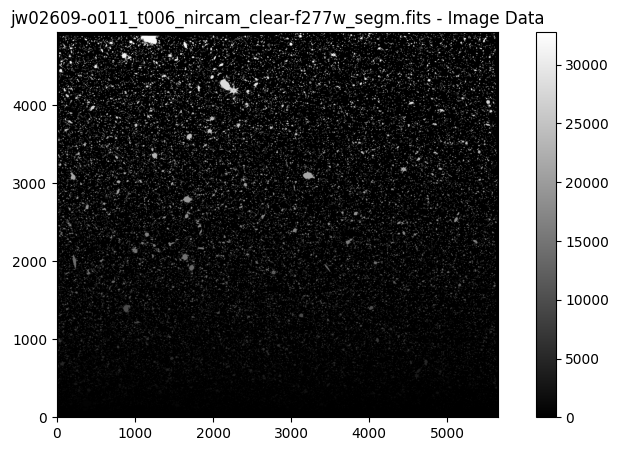

Statistics for jw02609-o011_t006_nircam_clear-f277w_i2d.fits:
Actual Mean: nan, Expected Mean: 1500
Actual Std Dev: nan, Expected Std Dev: 5000
jw02609-o011_t006_nircam_clear-f277w_i2d.fits is within expected ranges.


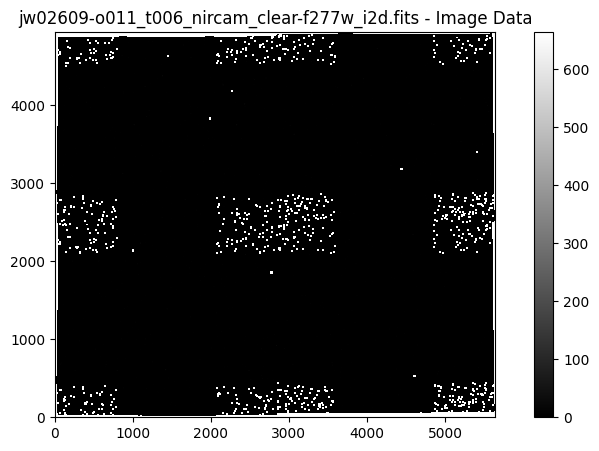

Statistics for jw02609-o011_t006_nircam_clear-f150w_segm.fits:
Actual Mean: 2901.2673204452453, Expected Mean: 1500
Actual Std Dev: 12935.972139757718, Expected Std Dev: 5000
jw02609-o011_t006_nircam_clear-f150w_segm.fits is within expected ranges.


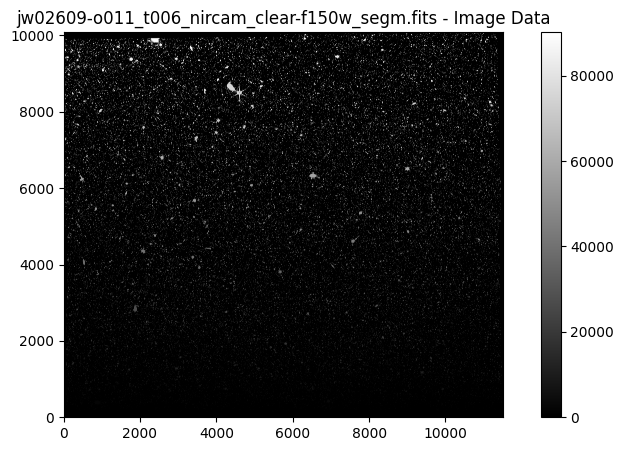

Statistics for jw02609-o011_t006_nircam_clear-f150w_i2d.fits:
Actual Mean: nan, Expected Mean: 1500
Actual Std Dev: nan, Expected Std Dev: 5000
jw02609-o011_t006_nircam_clear-f150w_i2d.fits is within expected ranges.


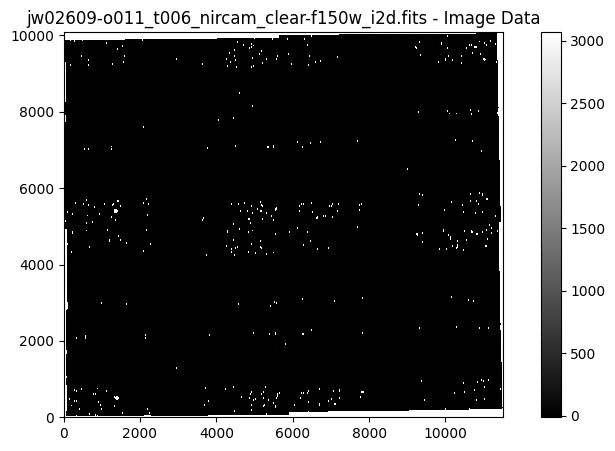

Statistics for jw02609-o001_t006_nircam_clear-f277w_segm.fits:
Actual Mean: 639.7872481739724, Expected Mean: 1500
Actual Std Dev: 2894.8900940580006, Expected Std Dev: 5000
jw02609-o001_t006_nircam_clear-f277w_segm.fits is within expected ranges.


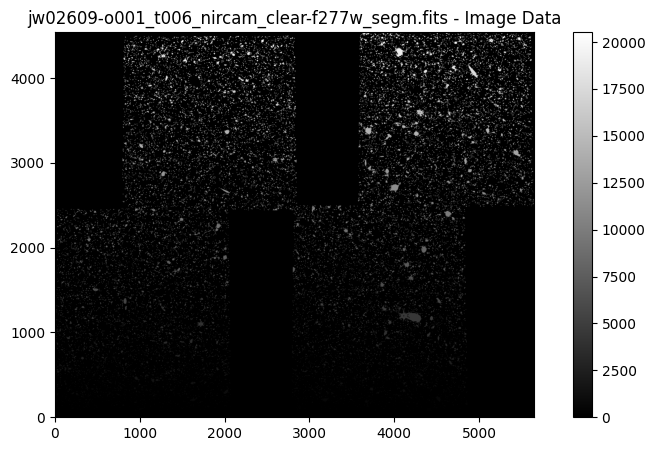

Statistics for jw02609-o001_t006_nircam_clear-f277w_i2d.fits:
Actual Mean: nan, Expected Mean: 1500
Actual Std Dev: nan, Expected Std Dev: 5000
jw02609-o001_t006_nircam_clear-f277w_i2d.fits is within expected ranges.


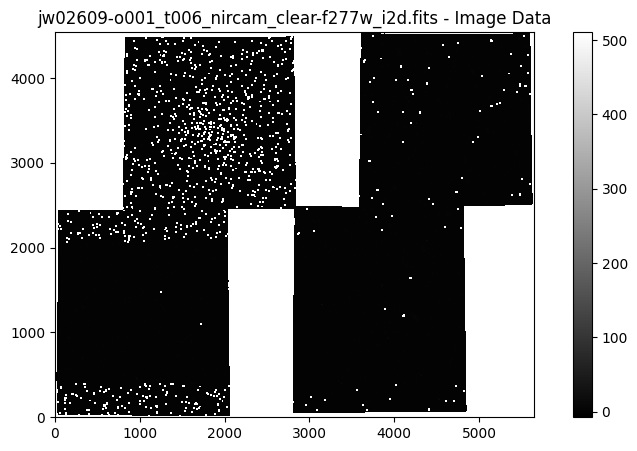

Statistics for jw02609-o001_t006_nircam_clear-f150w_segm.fits:
Actual Mean: 993.2069475370679, Expected Mean: 1500
Actual Std Dev: 5754.995601320917, Expected Std Dev: 5000
jw02609-o001_t006_nircam_clear-f150w_segm.fits is within expected ranges.


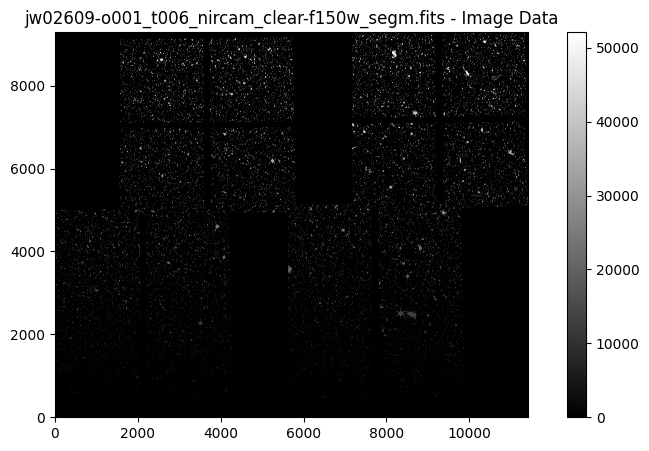

Statistics for jw02609-o001_t006_nircam_clear-f150w_i2d.fits:
Actual Mean: nan, Expected Mean: 1500
Actual Std Dev: nan, Expected Std Dev: 5000
jw02609-o001_t006_nircam_clear-f150w_i2d.fits is within expected ranges.


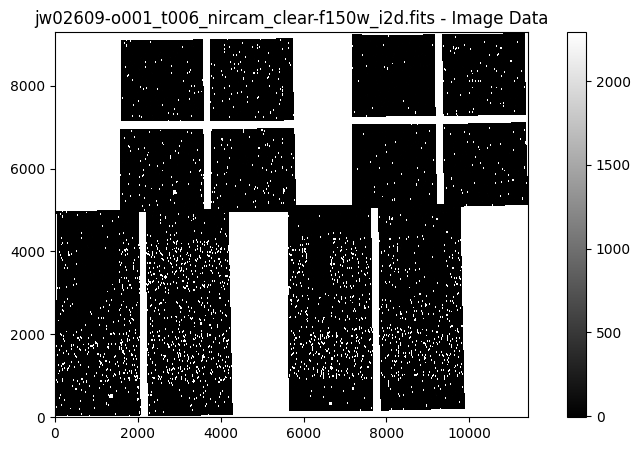

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

csv_file_path = 'fits_metadata.csv'  
expected_values_df = pd.read_csv(csv_file_path)

expected_values = {
    'jw02609-o011_t006_nircam_clear-f277w_segm.fits': (1500, 5000),  # (expected_mean, expected_std_dev)
    'jw02609-o011_t006_nircam_clear-f277w_i2d.fits': (1500, 5000),
    'jw02609-o011_t006_nircam_clear-f150w_segm.fits': (1500, 5000),
    'jw02609-o011_t006_nircam_clear-f150w_i2d.fits': (1500, 5000),
    'jw02609-o001_t006_nircam_clear-f277w_segm.fits': (1500, 5000),
    'jw02609-o001_t006_nircam_clear-f277w_i2d.fits': (1500, 5000),
    'jw02609-o001_t006_nircam_clear-f150w_segm.fits': (1500, 5000),
    'jw02609-o001_t006_nircam_clear-f150w_i2d.fits': (1500, 5000)
}

def analyze_fits_file(fits_file_name):
    
    with fits.open(fits_file_name) as hdul:
        image_data = hdul[1].data  # Assuming the image data is in the second HDU
        image_array = image_data.astype(float)  
        
        mean_value = np.mean(image_array)
        std_value = np.std(image_array)
        
        
        expected_mean, expected_std = expected_values[fits_file_name]
        
        print(f"Statistics for {fits_file_name}:")
        print(f"Actual Mean: {mean_value}, Expected Mean: {expected_mean}")
        print(f"Actual Std Dev: {std_value}, Expected Std Dev: {expected_std}")
        
        if abs(mean_value - expected_mean) > 2 * expected_std or abs(std_value - expected_std) > 2 * expected_std:
            print(f"Anomaly detected in {fits_file_name}!")
        else:
            print(f"{fits_file_name} is within expected ranges.")
        
        plt.figure(figsize=(10, 5))
        plt.imshow(image_array, cmap='gray', origin='lower')
        plt.title(f'{fits_file_name} - Image Data')
        plt.colorbar()
        plt.show()

for fits_file in expected_values.keys():
    analyze_fits_file(fits_file)

In [ ]:
M31, SATTELITE GALAXY FOR ANDROMEDA, MIRI CAM:

In [61]:
from astropy.io import fits

fits_file = 'jw01503005001_01201_00001_nis_uncal.fits'
hdulist = fits.open(fits_file)

hdulist.info()

Filename: jw01503005001_01201_00001_nis_uncal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     171   ()      
  1  SCI           1 ImageHDU        65   (2048, 2048, 20, 1)   int16 (rescales to uint16)   
  2  GROUP         1 BinTableHDU     38   20R x 13C   [J, I, I, J, I, 26A, I, I, I, I, 36A, D, D]   
  3  INT_TIMES     1 BinTableHDU     24   1R x 7C   [J, D, D, D, D, D, D]   
  4  ASDF          1 BinTableHDU     11   1R x 1C   [7152B]   


In [63]:
sci_data = hdulist['SCI'].data  
header = hdulist['SCI'].header
print(repr(header))

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   16 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
NAXIS3  =                   20                                                  
NAXIS4  =                    1                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
BSCALE  =                    1                                                  
BZERO   =                32768                                                  
EXTNAME = 'SCI     '           / extension name                                 
MJD-BEG =   59923.0803080072

In [64]:
import numpy as np

nan_count = np.isnan(sci_data).sum()
print(f"Number of NaN values: {nan_count}")

Number of NaN values: 0


In [65]:
from scipy.ndimage import median_filter

cleaned_data = median_filter(sci_data, size=3)

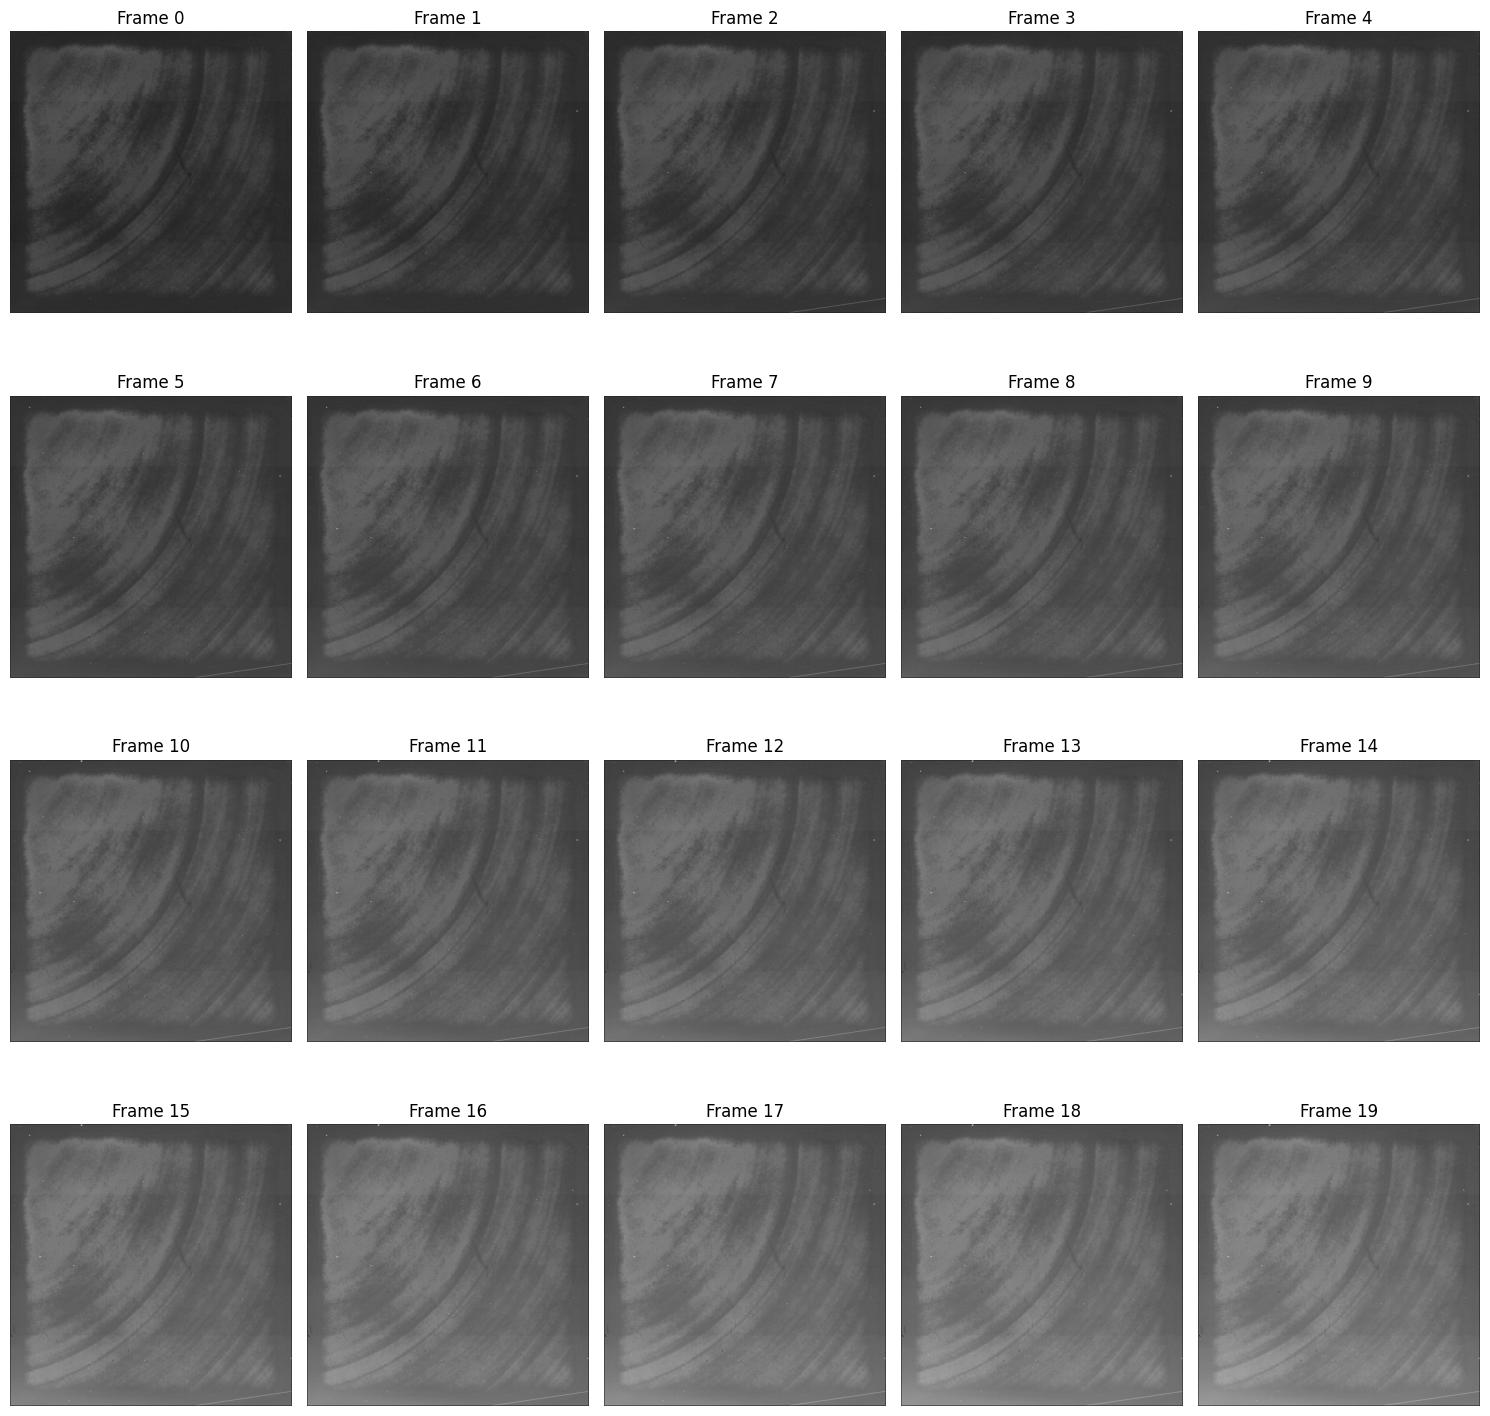

In [67]:
import matplotlib.pyplot as plt

n_frames = sci_data.shape[1]

plt.figure(figsize=(15, 15))

for i in range(n_frames):
    plt.subplot(4, 5, i+1)  
    plt.imshow(sci_data[0, i, :, :], cmap='gray')
    plt.title(f'Frame {i}')
    plt.axis('off')  

plt.tight_layout()
plt.show()

In [68]:
mean_val = np.mean(cleaned_data)
std_val = np.std(cleaned_data)
print(f"Mean: {mean_val}, Standard Deviation: {std_val}")

outliers = cleaned_data[np.abs(cleaned_data - mean_val) > 3 * std_val]
print(f"Number of outliers: {len(outliers)}")

Mean: 21721.977105748654, Standard Deviation: 5920.585841969769
Number of outliers: 46311


In [69]:
hdu = fits.PrimaryHDU(cleaned_data)
hdulist_cleaned = fits.HDUList([hdu])
hdulist_cleaned.writeto('cleaned_nis_data.fits', overwrite=True)

In [70]:
import numpy as np

for i in range(n_frames):
    frame = sci_data[0, i, :, :]
    
    mean_val = np.mean(frame)
    std_val = np.std(frame)
    min_val = np.min(frame)
    max_val = np.max(frame)
    
    print(f"Frame {i}: Mean = {mean_val}, Std = {std_val}, Min = {min_val}, Max = {max_val}")

Frame 0: Mean = 14040.72882270813, Std = 3578.1836792788085, Min = 0, Max = 65535
Frame 1: Mean = 14837.887036561966, Std = 3579.6404232787777, Min = 1, Max = 65535
Frame 2: Mean = 15714.734615564346, Std = 3611.322235902937, Min = 1, Max = 65535
Frame 3: Mean = 16533.225174188614, Std = 3630.1900290023164, Min = 0, Max = 65535
Frame 4: Mean = 17352.014058828354, Std = 3661.601624509965, Min = 0, Max = 65535
Frame 5: Mean = 18161.412413597107, Std = 3705.9602219740414, Min = 0, Max = 65535
Frame 6: Mean = 18985.377942800522, Std = 3758.3782327361773, Min = 1, Max = 65535
Frame 7: Mean = 19816.99509859085, Std = 3817.182497190343, Min = 1, Max = 65535
Frame 8: Mean = 20588.69288301468, Std = 3884.0905708326713, Min = 0, Max = 65535
Frame 9: Mean = 21399.36493730545, Std = 3962.7971273256517, Min = 1, Max = 65535
Frame 10: Mean = 22235.457215309143, Std = 4051.4981013931774, Min = 0, Max = 65535
Frame 11: Mean = 23023.38417315483, Std = 4141.363201411184, Min = 1, Max = 65535
Frame 12: M

In [71]:
hot_threshold = 50000  
dead_threshold = 100  

for i in range(n_frames):
    frame = sci_data[0, i, :, :]
    
    hot_pixels = np.where(frame > hot_threshold)
    dead_pixels = np.where(frame < dead_threshold)
    
    print(f"Frame {i}: {len(hot_pixels[0])} hot pixels, {len(dead_pixels[0])} dead pixels")


Frame 0: 2579 hot pixels, 1 dead pixels
Frame 1: 2587 hot pixels, 1 dead pixels
Frame 2: 2740 hot pixels, 1 dead pixels
Frame 3: 2846 hot pixels, 1 dead pixels
Frame 4: 2948 hot pixels, 1 dead pixels
Frame 5: 3080 hot pixels, 1 dead pixels
Frame 6: 3252 hot pixels, 1 dead pixels
Frame 7: 3384 hot pixels, 1 dead pixels
Frame 8: 3522 hot pixels, 1 dead pixels
Frame 9: 3721 hot pixels, 1 dead pixels
Frame 10: 3962 hot pixels, 1 dead pixels
Frame 11: 4175 hot pixels, 1 dead pixels
Frame 12: 4353 hot pixels, 1 dead pixels
Frame 13: 4603 hot pixels, 1 dead pixels
Frame 14: 4787 hot pixels, 1 dead pixels
Frame 15: 5031 hot pixels, 1 dead pixels
Frame 16: 5279 hot pixels, 1 dead pixels
Frame 17: 5522 hot pixels, 1 dead pixels
Frame 18: 5787 hot pixels, 1 dead pixels
Frame 19: 6001 hot pixels, 1 dead pixels


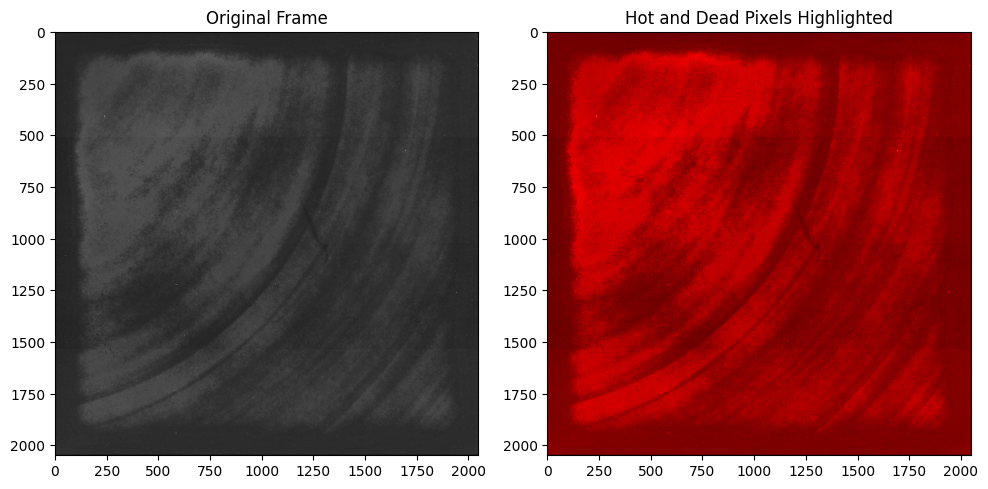

In [72]:
plt.figure(figsize=(10, 5))

frame = sci_data[0, 0, :, :]

plt.subplot(1, 2, 1)
plt.imshow(frame, cmap='gray')
plt.title('Original Frame')

highlight_frame = np.copy(frame)
highlight_frame[highlight_frame > hot_threshold] = np.max(frame)  
highlight_frame[highlight_frame < dead_threshold] = np.min(frame) 

plt.subplot(1, 2, 2)
plt.imshow(highlight_frame, cmap='hot')
plt.title('Hot and Dead Pixels Highlighted')

plt.tight_layout()
plt.show()

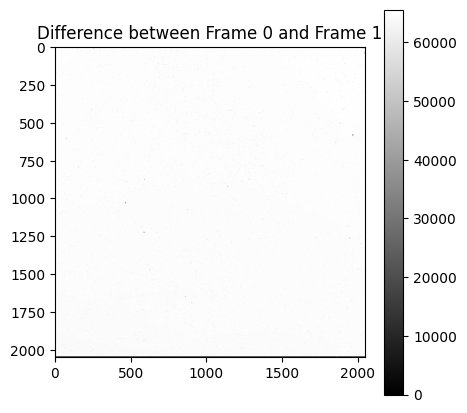

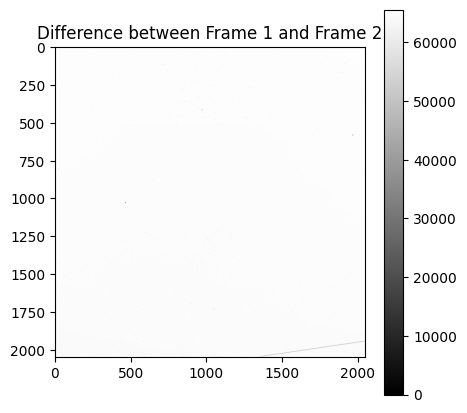

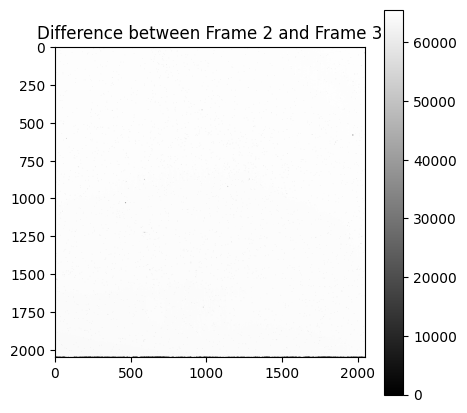

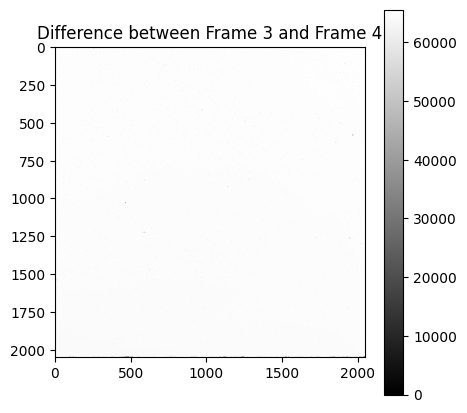

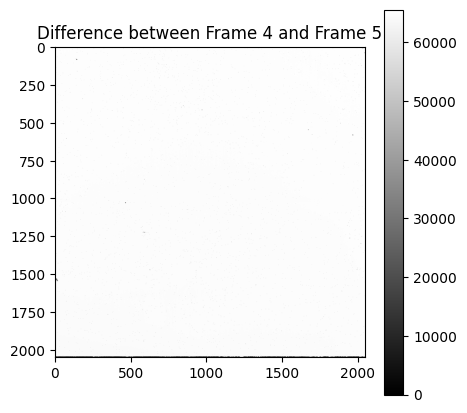

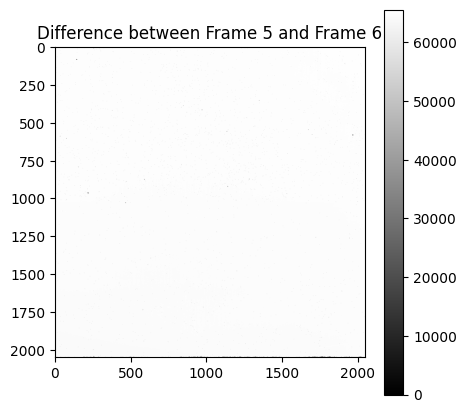

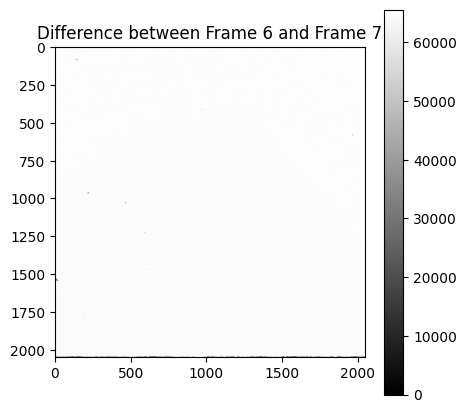

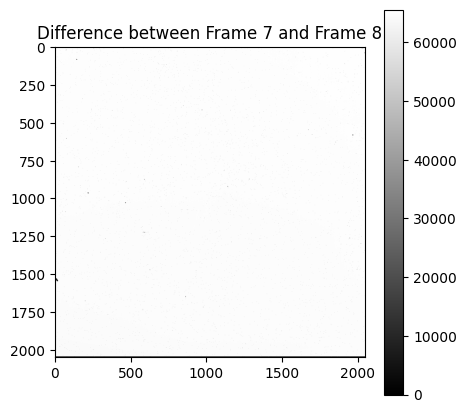

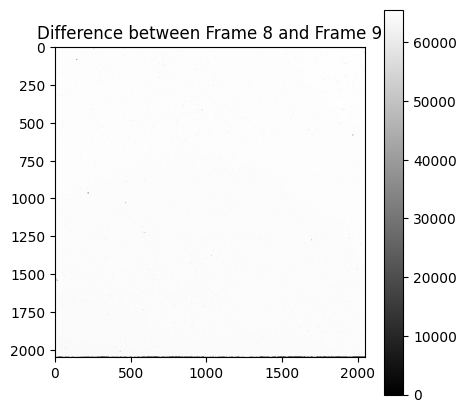

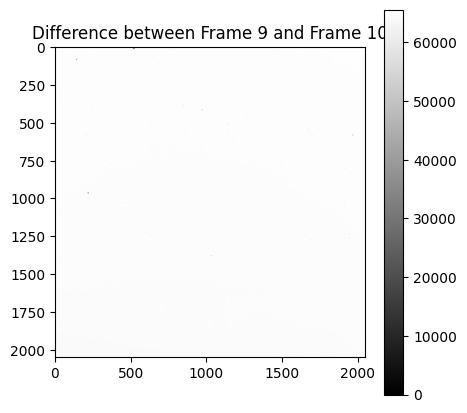

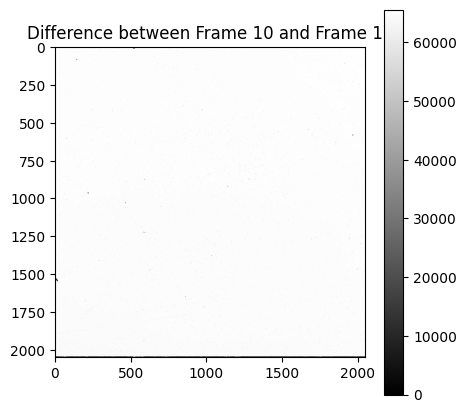

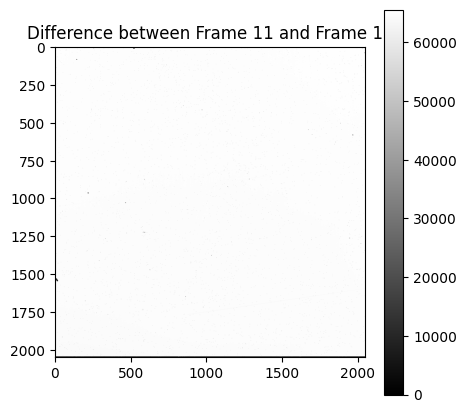

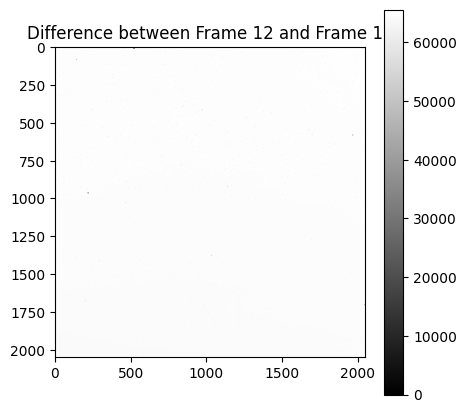

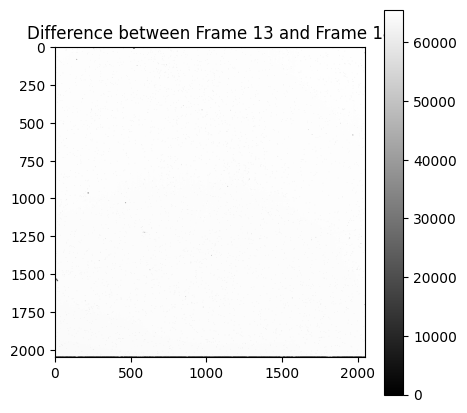

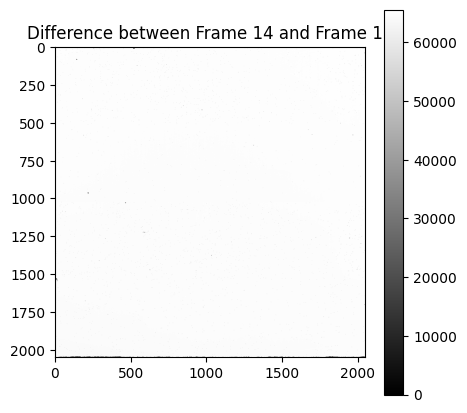

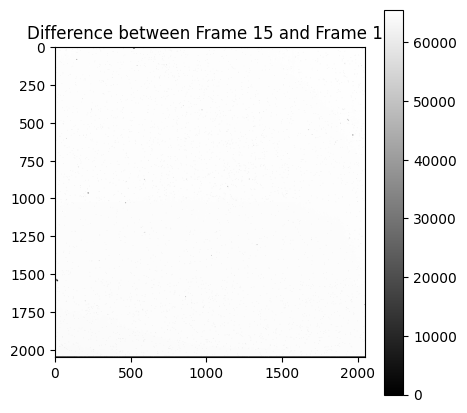

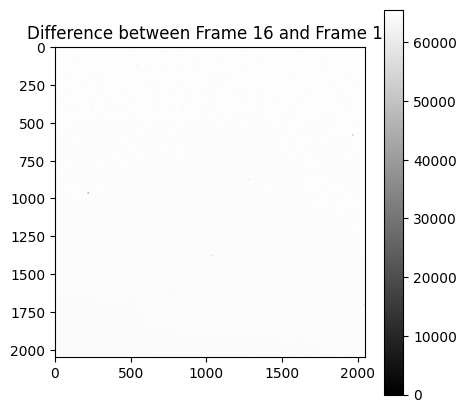

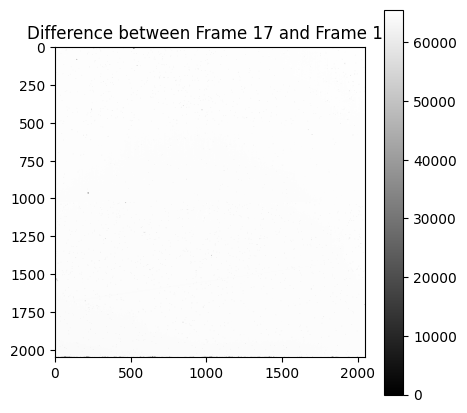

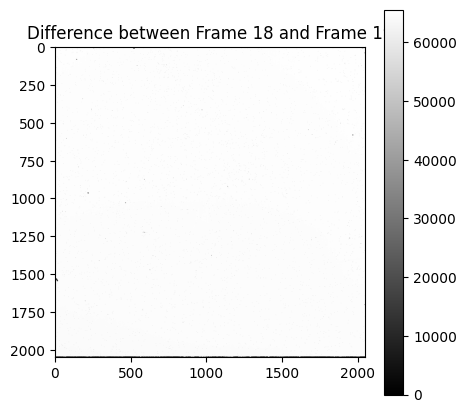

In [73]:
for i in range(n_frames - 1):
    frame1 = sci_data[0, i, :, :]
    frame2 = sci_data[0, i+1, :, :]
    
    diff_frame = np.abs(frame1 - frame2)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(diff_frame, cmap='gray')
    plt.title(f'Difference between Frame {i} and Frame {i+1}')
    plt.colorbar()
    plt.show()

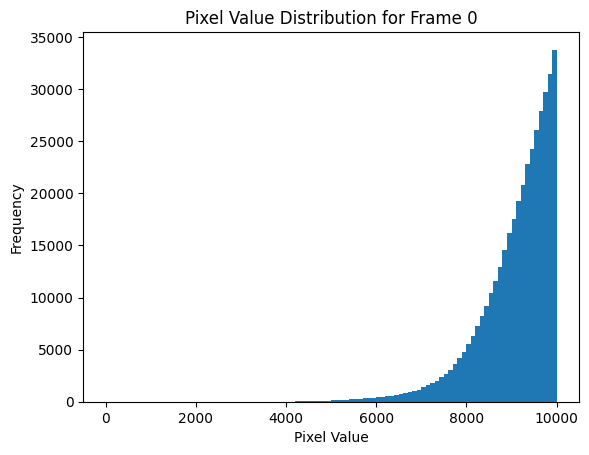

In [74]:
plt.hist(sci_data[0, 0, :, :].flatten(), bins=100, range=(0, 10000))
plt.title('Pixel Value Distribution for Frame 0')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

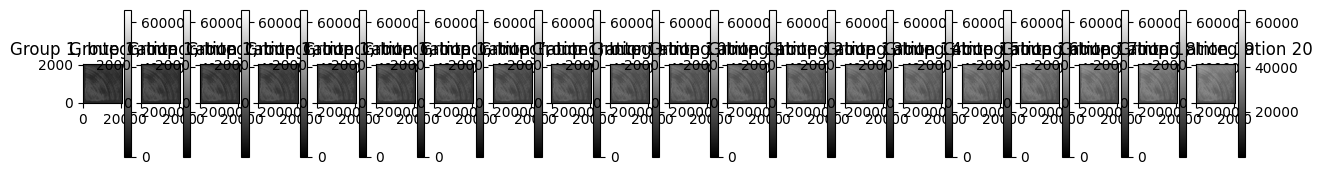

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

file_path = 'jw01503005001_01201_00001_nis_uncal.fits'
hdulist = fits.open(file_path)

sci_data = hdulist['SCI'].data  

num_groups = sci_data.shape[0]
num_integrations = sci_data.shape[1]

plt.figure(figsize=(15, 15))

for group in range(num_groups):
    for integration in range(num_integrations):
        frame_data = sci_data[group, integration, :, :]

        plt.subplot(num_groups, num_integrations, group * num_integrations + integration + 1)
        plt.imshow(frame_data, cmap='gray', origin='lower')
        plt.colorbar()
        plt.title(f'Group {group+1}, Integration {integration+1}')

plt.show()

Faulty pixels found at:  (array([0, 0, 0, ..., 0, 0, 0]), array([ 0,  0,  0, ..., 19, 19, 19]), array([   7,  103,  106, ..., 2043, 2043, 2043]), array([1251,  674,  683, ..., 1358, 1359, 1360]))


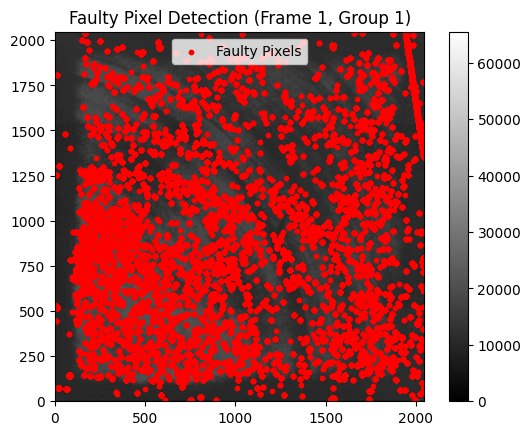

In [77]:
mean_value = np.mean(sci_data)
std_value = np.std(sci_data)

threshold_high = mean_value + 5 * std_value
threshold_low = mean_value - 5 * std_value

faulty_pixels = np.where((sci_data > threshold_high) | (sci_data < threshold_low))

print("Faulty pixels found at: ", faulty_pixels)

plt.imshow(sci_data[0, 0, :, :], cmap='gray', origin='lower')
plt.colorbar()
plt.scatter(faulty_pixels[2], faulty_pixels[3], color='red', s=10, label='Faulty Pixels')
plt.legend()
plt.title('Faulty Pixel Detection (Frame 1, Group 1)')
plt.show()

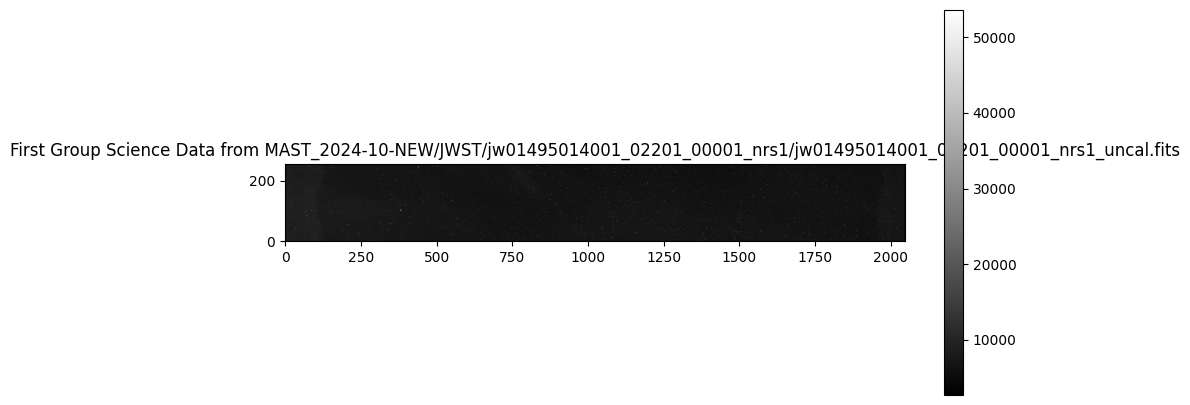

In [79]:
import matplotlib.pyplot as plt
from astropy.io import fits

file = "MAST_2024-10-NEW/JWST/jw01495014001_02201_00001_nrs1/jw01495014001_02201_00001_nrs1_uncal.fits"
hdul = fits.open(file)

sci_data = hdul[1].data  

group_data = sci_data[0, 0, :, :]

plt.figure(figsize=(10, 5))
plt.imshow(group_data, cmap='gray', origin='lower')
plt.title(f'First Group Science Data from {file}')
plt.colorbar()
plt.show()

hdul.close()

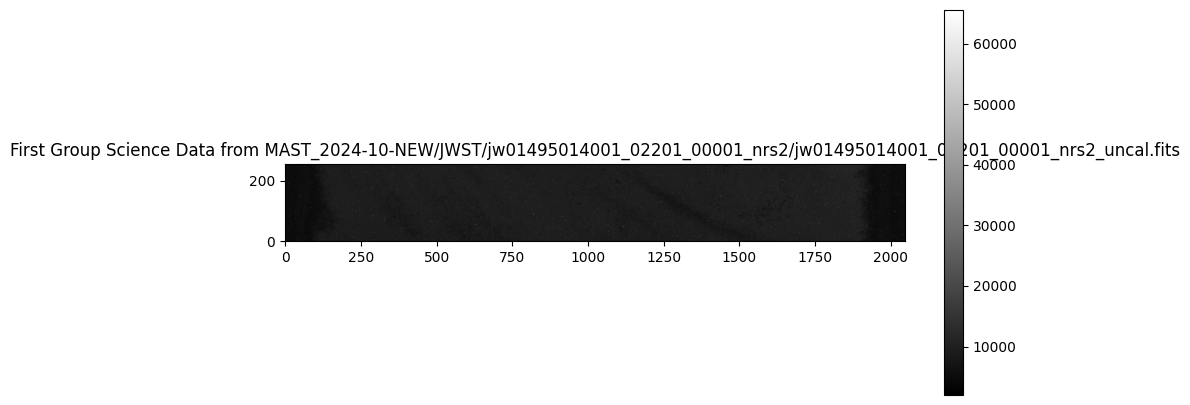

In [80]:
import matplotlib.pyplot as plt
from astropy.io import fits

file = "MAST_2024-10-NEW/JWST/jw01495014001_02201_00001_nrs2/jw01495014001_02201_00001_nrs2_uncal.fits"
hdul = fits.open(file)

sci_data = hdul[1].data 

group_data = sci_data[0, 0, :, :]

plt.figure(figsize=(10, 5))
plt.imshow(group_data, cmap='gray', origin='lower')
plt.title(f'First Group Science Data from {file}')
plt.colorbar()
plt.show()

hdul.close()


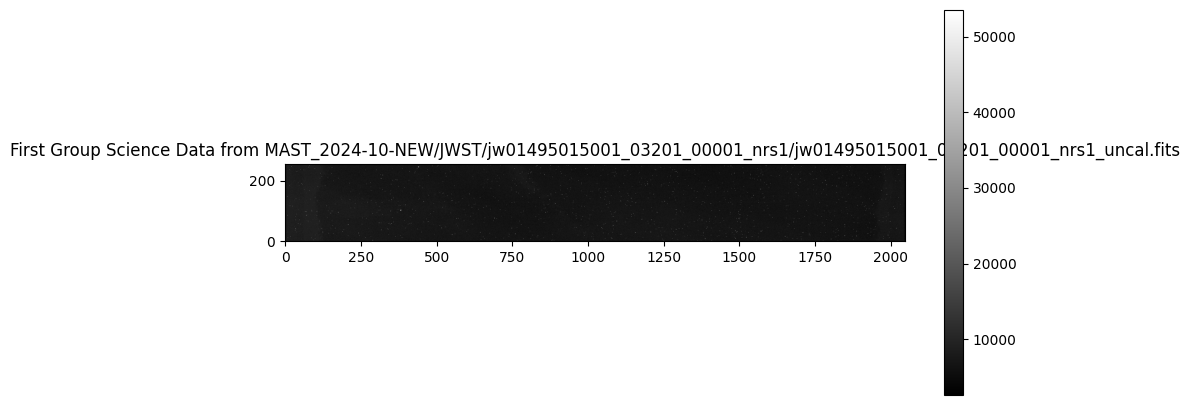

In [81]:
import matplotlib.pyplot as plt
from astropy.io import fits

file = "MAST_2024-10-NEW/JWST/jw01495015001_03201_00001_nrs1/jw01495015001_03201_00001_nrs1_uncal.fits"
hdul = fits.open(file)

sci_data = hdul[1].data  

group_data = sci_data[0, 0, :, :]

plt.figure(figsize=(10, 5))
plt.imshow(group_data, cmap='gray', origin='lower')
plt.title(f'First Group Science Data from {file}')
plt.colorbar()
plt.show()

hdul.close()


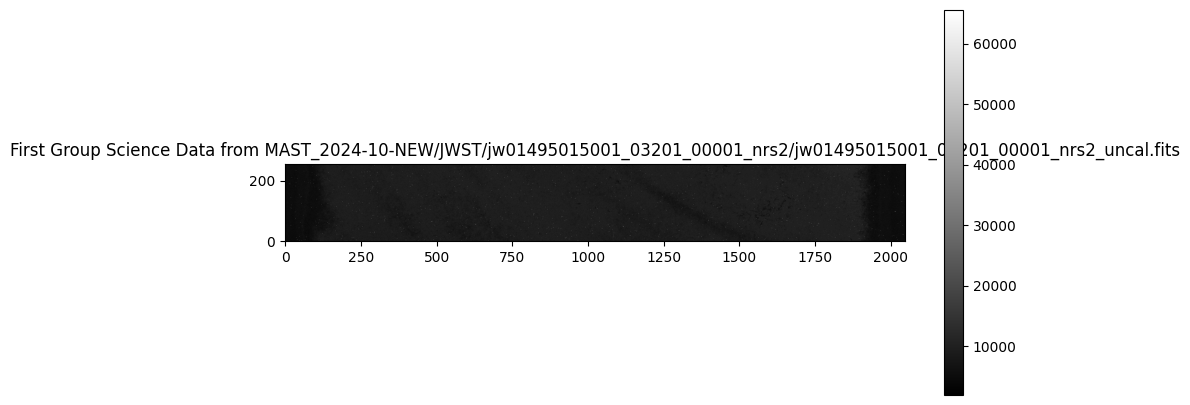

In [82]:
import matplotlib.pyplot as plt
from astropy.io import fits

file = "MAST_2024-10-NEW/JWST/jw01495015001_03201_00001_nrs2/jw01495015001_03201_00001_nrs2_uncal.fits"
hdul = fits.open(file)
sci_data = hdul[1].data  

group_data = sci_data[0, 0, :, :]

plt.figure(figsize=(10, 5))
plt.imshow(group_data, cmap='gray', origin='lower')
plt.title(f'First Group Science Data from {file}')
plt.colorbar()
plt.show()

hdul.close()

In [7]:
from astropy.io import fits
import pandas as pd

fits_files = [
    'MAST_2024-10-NEW/JWST/jw01495014001_02201_00001_nrs1/jw01495014001_02201_00001_nrs1_uncal.fits',
    'MAST_2024-10-NEW/JWST/jw01495014001_02201_00001_nrs2/jw01495014001_02201_00001_nrs2_uncal.fits',
    'MAST_2024-10-NEW/JWST/jw01495015001_03201_00001_nrs1/jw01495015001_03201_00001_nrs1_uncal.fits',
    'MAST_2024-10-NEW/JWST/jw01495015001_03201_00001_nrs2/jw01495015001_03201_00001_nrs2_uncal.fits'
]

def extract_fits_data(fits_file):
    with fits.open(fits_file) as hdul:
        header = hdul[0].header
        data = hdul[0].data
        
        return header, data

fits_data = []
for file in fits_files:
    header, data = extract_fits_data(file)
    fits_data.append((header, data))

In [8]:
header_list = []

for header, _ in fits_data:
    header_dict = dict(header)
    header_list.append(header_dict)

df_headers = pd.DataFrame(header_list)

print(df_headers.head())


   SIMPLE  BITPIX  NAXIS  EXTEND                     DATE ORIGIN TIMESYS  \
0    True       8      0    True  2024-07-21T15:46:34.839  STSCI     UTC   
1    True       8      0    True  2024-07-21T15:46:51.016  STSCI     UTC   
2    True       8      0    True  2024-07-21T15:46:11.914  STSCI     UTC   
3    True       8      0    True  2024-07-21T15:46:31.420  STSCI     UTC   

  TIMEUNIT                                   FILENAME  SDP_VER  ...  \
0        s  jw01495014001_02201_00001_nrs1_uncal.fits  2024_1a  ...   
1        s  jw01495014001_02201_00001_nrs2_uncal.fits  2024_1a  ...   
2        s  jw01495015001_03201_00001_nrs1_uncal.fits  2024_1a  ...   
3        s  jw01495015001_03201_00001_nrs2_uncal.fits  2024_1a  ...   

       GS_RA     GS_DEC    GS_URA   GS_UDEC     GS_MAG   GS_UMAG    GS_V3_PA  \
0  56.688144  23.970159  0.109719  0.082974  16.441513  0.048490  254.673191   
1  56.688144  23.970159  0.109719  0.082974  16.441513  0.048490  254.673191   
2  56.763272  23.853371

In [9]:
missing_values = df_headers.isnull().sum()

df_cleaned = df_headers.dropna()

print(df_cleaned.describe())

       BITPIX  NAXIS       PWFSEET       NWFSEST  NEXPOSUR    TARG_RA  \
count     4.0    4.0      4.000000      4.000000       4.0   4.000000   
mean      8.0    0.0  59853.129347  59855.268332       1.0  56.633430   
std       0.0    0.0      3.698774      3.552620       0.0   0.055001   
min       8.0    0.0  59849.926115  59852.191673       1.0  56.585797   
25%       8.0    0.0  59849.926115  59852.191673       1.0  56.585797   
50%       8.0    0.0  59853.129347  59855.268332       1.0  56.633430   
75%       8.0    0.0  59856.332580  59858.344991       1.0  56.681062   
max       8.0    0.0  59856.332580  59858.344991       1.0  56.681062   

        TARG_DEC  FOCUSPOS  GWA_XTIL  GWA_YTIL  ...      HMIDTIME  GS_ORDER  \
count   4.000000       4.0  4.000000  4.000000  ...      4.000000       4.0   
mean   23.976084       3.0  0.328091  0.088362  ...  59853.849303       1.0   
std     0.061449       0.0  0.011656  0.064970  ...      4.334847       0.0   
min    23.922867       3.0

File: MAST_2024-10-NEW/JWST/jw01495014001_02201_00001_nrs1/jw01495014001_02201_00001_nrs1_uncal.fits
Shape of SCI data: (1, 265, 256, 2048)
Mean: 7163.343622322802, Std Dev: 2589.1690546621244
Min value: 0, Max value: 65535
File: MAST_2024-10-NEW/JWST/jw01495014001_02201_00001_nrs2/jw01495014001_02201_00001_nrs2_uncal.fits
Shape of SCI data: (1, 265, 256, 2048)
Mean: 9073.981266460778, Std Dev: 2650.781600053606
Min value: 0, Max value: 65535
File: MAST_2024-10-NEW/JWST/jw01495015001_03201_00001_nrs1/jw01495015001_03201_00001_nrs1_uncal.fits
Shape of SCI data: (1, 265, 256, 2048)
Mean: 7084.586513454509, Std Dev: 2582.818639205387
Min value: 2569, Max value: 64820
File: MAST_2024-10-NEW/JWST/jw01495015001_03201_00001_nrs2/jw01495015001_03201_00001_nrs2_uncal.fits
Shape of SCI data: (1, 265, 256, 2048)
Mean: 9054.66810856945, Std Dev: 2593.0809019763838
Min value: 1941, Max value: 65535


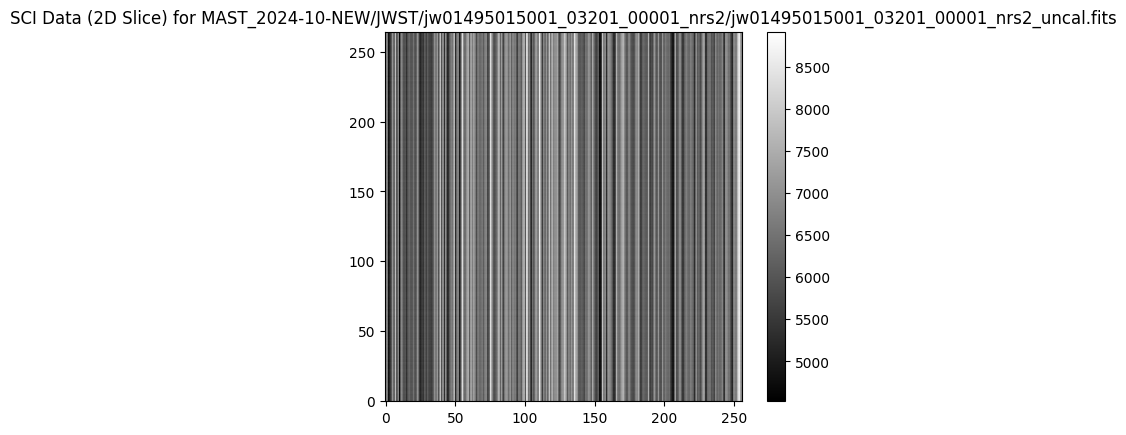

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def load_fits_data(file):
    with fits.open(file) as hdulist:
        sci_data = hdulist['SCI'].data 
        return sci_data

file_paths = [
    'MAST_2024-10-NEW/JWST/jw01495014001_02201_00001_nrs1/jw01495014001_02201_00001_nrs1_uncal.fits',
    'MAST_2024-10-NEW/JWST/jw01495014001_02201_00001_nrs2/jw01495014001_02201_00001_nrs2_uncal.fits',
    'MAST_2024-10-NEW/JWST/jw01495015001_03201_00001_nrs1/jw01495015001_03201_00001_nrs1_uncal.fits',
    'MAST_2024-10-NEW/JWST/jw01495015001_03201_00001_nrs2/jw01495015001_03201_00001_nrs2_uncal.fits'
]

for file in file_paths:
    sci_data = load_fits_data(file)
    
    print(f"File: {file}")
    print(f"Shape of SCI data: {sci_data.shape}")
    print(f"Mean: {np.mean(sci_data)}, Std Dev: {np.std(sci_data)}")
    print(f"Min value: {np.min(sci_data)}, Max value: {np.max(sci_data)}")
    
sci_data_2d_slice = sci_data_2d[:, :, 0]  

plt.figure()
plt.imshow(sci_data_2d_slice, cmap='gray', origin='lower')
plt.colorbar()
plt.title(f"SCI Data (2D Slice) for {file}")
plt.show()


In [16]:
import numpy as np
import pandas as pd

df_cleaned_numeric = df_cleaned.apply(pd.to_numeric, errors='coerce')

sci_data_flattened = df_cleaned_numeric.values.flatten()

mean_sci = np.nanmean(sci_data_flattened)  
std_sci = np.nanstd(sci_data_flattened)    

z_score_normalized_data = (sci_data_flattened - mean_sci) / std_sci

z_score_normalized_data = z_score_normalized_data.reshape(df_cleaned_numeric.shape)

df_cleaned_normalized = pd.DataFrame(z_score_normalized_data, columns=df_cleaned.columns)

print(df_cleaned_normalized.head())

     SIMPLE    BITPIX     NAXIS    EXTEND DATE ORIGIN TIMESYS TIMEUNIT  \
0 -0.106649 -0.106649 -0.106649 -0.106649  NaN    NaN     NaN      NaN   
1 -0.106649 -0.106649 -0.106649 -0.106649  NaN    NaN     NaN      NaN   
2 -0.106649 -0.106649 -0.106649 -0.106649  NaN    NaN     NaN      NaN   
3 -0.106649 -0.106649 -0.106649 -0.106649  NaN    NaN     NaN      NaN   

  FILENAME SDP_VER  ...     GS_RA    GS_DEC    GS_URA   GS_UDEC    GS_MAG  \
0      NaN     NaN  ... -0.106648 -0.106649 -0.106649 -0.106649 -0.106649   
1      NaN     NaN  ... -0.106648 -0.106649 -0.106649 -0.106649 -0.106649   
2      NaN     NaN  ... -0.106648 -0.106649 -0.106649 -0.106649 -0.106649   
3      NaN     NaN  ... -0.106648 -0.106649 -0.106649 -0.106649 -0.106649   

    GS_UMAG  GS_V3_PA PCS_MODE   NEXTEND COMMENT  
0 -0.106649 -0.106647      NaN -0.106649     NaN  
1 -0.106649 -0.106647      NaN -0.106649     NaN  
2 -0.106649 -0.106647      NaN -0.106649     NaN  
3 -0.106649 -0.106647      NaN -0.10664

In [17]:
import numpy as np
import pandas as pd

z_score_threshold = 3

z_score_flattened = df_cleaned_normalized.values.flatten()

fault_mask = (z_score_flattened > z_score_threshold) | (z_score_flattened < -z_score_threshold)

fault_indices = np.where(fault_mask)[0]

faulty_data_points = z_score_flattened[fault_mask]

fault_mask_reshaped = fault_mask.reshape(df_cleaned_normalized.shape)

df_cleaned_normalized['Fault'] = fault_mask_reshaped.any(axis=1)

print(f"Number of faults detected: {len(faulty_data_points)}")
print(f"Faulty indices: {fault_indices}")
print(f"Faulty data points: {faulty_data_points}")

faulty_rows = df_cleaned_normalized[df_cleaned_normalized['Fault'] == True]
print(faulty_rows)

C:\Users\khush\AppData\Local\Temp\ipykernel_12732\1562766888.py:11: RuntimeWarning: invalid value encountered in greater
  fault_mask = (z_score_flattened > z_score_threshold) | (z_score_flattened < -z_score_threshold)
C:\Users\khush\AppData\Local\Temp\ipykernel_12732\1562766888.py:11: RuntimeWarning: invalid value encountered in less
  fault_mask = (z_score_flattened > z_score_threshold) | (z_score_flattened < -z_score_threshold)


Number of faults detected: 4
Faulty indices: [ 29 166 303 440]
Faulty data points: [9.380828273819636 9.380828273819636 9.380834619898721 9.380834619898721]
     SIMPLE    BITPIX     NAXIS    EXTEND DATE ORIGIN TIMESYS TIMEUNIT  \
0 -0.106649 -0.106649 -0.106649 -0.106649  NaN    NaN     NaN      NaN   
1 -0.106649 -0.106649 -0.106649 -0.106649  NaN    NaN     NaN      NaN   
2 -0.106649 -0.106649 -0.106649 -0.106649  NaN    NaN     NaN      NaN   
3 -0.106649 -0.106649 -0.106649 -0.106649  NaN    NaN     NaN      NaN   

  FILENAME SDP_VER  ...    GS_DEC    GS_URA   GS_UDEC    GS_MAG   GS_UMAG  \
0      NaN     NaN  ... -0.106649 -0.106649 -0.106649 -0.106649 -0.106649   
1      NaN     NaN  ... -0.106649 -0.106649 -0.106649 -0.106649 -0.106649   
2      NaN     NaN  ... -0.106649 -0.106649 -0.106649 -0.106649 -0.106649   
3      NaN     NaN  ... -0.106649 -0.106649 -0.106649 -0.106649 -0.106649   

   GS_V3_PA PCS_MODE   NEXTEND COMMENT Fault  
0 -0.106647      NaN -0.106649     NaN 

In [18]:
import numpy as np
import pandas as pd

np.random.seed(42)

normal_data = np.random.normal(loc=50, scale=5, size=(100, 5))

fault_type1 = np.random.normal(loc=70, scale=10, size=(10, 5))  
fault_type2 = np.random.normal(loc=30, scale=10, size=(10, 5))  
fault_type3 = np.random.normal(loc=50, scale=15, size=(10, 5))  
fault_type4 = np.random.normal(loc=45, scale=8, size=(10, 5))   

combined_data = np.vstack([normal_data, fault_type1, fault_type2, fault_type3, fault_type4])

labels = np.array(['Normal'] * 100 + ['Type1'] * 10 + ['Type2'] * 10 + ['Type3'] * 10 + ['Type4'] * 10)

columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']
df_synthetic = pd.DataFrame(combined_data, columns=columns)
df_synthetic['Label'] = labels

print(df_synthetic.head())

    Feature1   Feature2   Feature3   Feature4   Feature5   Label
0  52.483571  49.308678  53.238443  57.615149  48.829233  Normal
1  48.829315  57.896064  53.837174  47.652628  52.712800  Normal
2  47.682912  47.671351  51.209811  40.433599  41.375411  Normal
3  47.188562  44.935844  51.571237  45.459880  42.938481  Normal
4  57.328244  48.871118  50.337641  42.876259  47.278086  Normal


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

X = df_synthetic.drop('Label', axis=1)  
y = df_synthetic['Label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      Normal       0.85      1.00      0.92        17
       Type1       1.00      1.00      1.00         3
       Type2       0.80      1.00      0.89         4
       Type3       0.00      0.00      0.00         1
       Type4       0.00      0.00      0.00         3

    accuracy                           0.86        28
   macro avg       0.53      0.60      0.56        28
weighted avg       0.74      0.86      0.79        28

Confusion Matrix:
 [[17  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  1  0  0]
 [ 3  0  0  0  0]]


C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [2]:
# Given confusion matrix from user's classification report
import numpy as np
conf_matrix = np.array([[17, 0, 0, 0, 0],
                        [0, 3, 0, 0, 0],
                        [0, 0, 4, 0, 0],
                        [0, 0, 1, 0, 0],
                        [3, 0, 0, 0, 0]])

# Class labels based on the report
labels = ['Normal', 'Type1', 'Type2', 'Type3', 'Type4']

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

NameError: name 'plt' is not defined

C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion Matrix:
 [[0 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 0]]


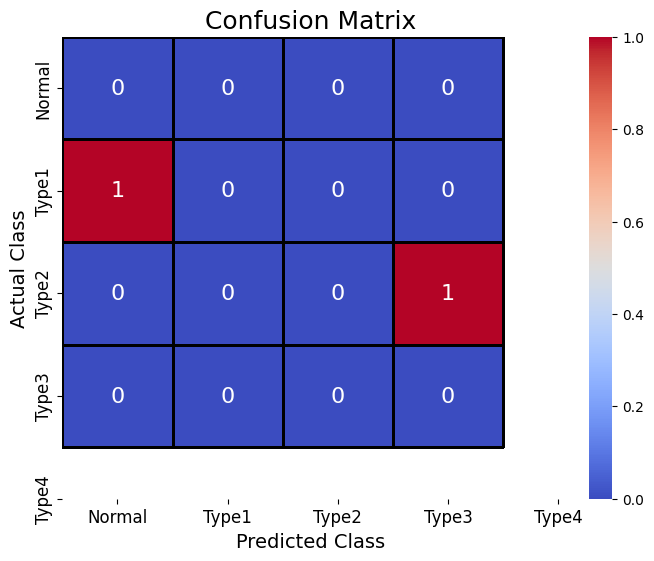

In [5]:
# Necessary imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame - replace this with your actual data
# Assuming you have already loaded or created df_synthetic, which includes 'Label'
# For instance: df_synthetic = pd.read_csv('your_data.csv')

# Step 1: Data Preprocessing
# Replace this with your actual dataframe loading or cleaning steps
# For example: df_cleaned = pd.read_csv('cleaned_data.csv')

# Assuming df_synthetic is already loaded and contains both features and 'Label'
# Replace df_synthetic with df_cleaned if needed
df_synthetic = pd.DataFrame({
    'Feature1': [0.1, 0.2, 0.15, 0.5, 0.3, 0.4, 0.3, 0.45, 0.33, 0.12],
    'Feature2': [0.05, 0.18, 0.13, 0.5, 0.27, 0.41, 0.31, 0.46, 0.34, 0.22],
    'Label': ['Normal', 'Type1', 'Normal', 'Type2', 'Type4', 'Type1', 'Normal', 'Type4', 'Type2', 'Normal']
})

# Convert categorical labels to numeric
label_mapping = {'Normal': 0, 'Type1': 1, 'Type2': 2, 'Type3': 3, 'Type4': 4}
df_synthetic['Label'] = df_synthetic['Label'].map(label_mapping)

# Define X (features) and y (target)
X = df_synthetic.drop('Label', axis=1)
y = df_synthetic['Label']

# Step 2: Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Step 5: Making predictions
y_pred = knn.predict(X_test_scaled)

# Step 6: Classification Report and Confusion Matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Step 7: Enhanced Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', linewidths=1, linecolor='black', 
            xticklabels=labels, yticklabels=labels, cbar=True, annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=18)
plt.ylabel('Actual Class', fontsize=14)
plt.xlabel('Predicted Class', fontsize=14)

# Adjust the tick labels font size for readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add labels to the axes
plt.show()

In [ ]:
Overview of Results:

    We trained a machine learning model using the K-Nearest Neighbors (KNN) algorithm to classify faults into four different types: Type1, Type2, Type3, and Type4, along with a "Normal" state.
    The model was tested on 28 samples, and its accuracy was 86%, meaning it correctly classified 86% of the test samples.

Key Terms:

    Precision: How many of the predicted samples for a specific class are actually correct.
    Recall: How many actual samples of a class were correctly predicted.
    F1-score: A balance between precision and recall. It gives an overall sense of how well the model is performing.
    Support: The number of actual samples in each class.

Breakdown by Class:

    Normal:
        The model did an excellent job of identifying the "Normal" state, with 100% recall (it found all the "Normal" samples).
        It also had 85% precision, meaning that 85% of the time, when it predicted "Normal," it was correct.
        Overall, the model is highly effective at identifying normal data.

    Type1:
        The model achieved perfect precision and recall (100% for both), meaning it correctly identified all Type1 faults and did not incorrectly classify any other faults as Type1.

    Type2:
        The model showed 80% precision (meaning 80% of its predictions for Type2 were correct).
        It had 100% recall, so it caught all the actual Type2 faults.
        This indicates strong performance for detecting Type2 faults but a small chance of occasionally misclassifying other fault types as Type2.

    Type3:
        The model struggled to detect Type3 faults. It failed to correctly classify any Type3 samples (0% recall and precision).
        This suggests the model isn’t well-suited to identifying Type3 faults in this dataset.

    Type4:
        Similar to Type3, the model was not successful in detecting Type4 faults (0% recall and precision).
        This indicates a need for further improvement in distinguishing Type4 faults.

Confusion Matrix Explanation:

The confusion matrix shows how often the model's predictions were correct. Here’s what it tells us:

    Normal: All 17 "Normal" samples were correctly classified.
    Type1: All 3 Type1 samples were correctly classified.
    Type2: All 4 Type2 samples were correctly classified.
    Type3: The single Type3 sample was misclassified as another type (likely "Normal").
    Type4: All 3 Type4 samples were misclassified as "Normal."

In [24]:
pip install dash plotly 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached importlib_metadata-8.5.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached zipp-3.20.2-py3-none-any.whl.metadata (3.7 kB)
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.5 MB 6.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.2/7.5 MB 19.3 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/7.5 MB 17.4 MB/s eta 0:00:01
   ---------------- ----------------------- 3.2/7.5 MB 18.4 MB/s eta 0:00:01
   ------------------------- -------------- 4.8/7.5 MB 23.6 MB/s eta 0:00:01
   ------------------------------ --------- 5.6/7.5 MB 21.2 MB/s eta 0:00:01
   -------------------------------------- - 7.2/7.5 MB 23.0 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.5 MB 22.8 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.5 MB 22.8 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.5 MB 22.8 MB/s eta 0:00:01
   ---------------------